In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

sns.set_theme()
pd.options.mode.chained_assignment = None

In [8]:
def get_graphs_i_need(file_name: str):
    df = pd.read_csv(file_name)

    # get pearson correlation coefficient

    df_deers = df[df['species'] == "Deer"]
    df_grass = df[df['species'] == "Grass"]

    print(f"R = {np.corrcoef(df_deers['population'], df_grass['population'])[0][1]}")

    data_count = max(df[df["species"] == "Deer"]["time"])
    
    # plotting deer/grass population
    plt.figure(figsize=(20, 7))
    plt.title("Populations against Time")

    g = sns.lineplot(data=df[(df['species'] == "Deer") | (df['species'] == "Grass")], x="time", y="population", hue="species", palette=["b", "g"], linewidth=2) # plot the populations against time

    average_deer_population = np.average(df[(df['species'] == "Deer")]["population"])
    print(f"Average deer population: {average_deer_population}")
    plt.plot([0, data_count], [average_deer_population, average_deer_population], "b--", linewidth=1, label="Average Deer Population")

    average_grass_population = np.average(df[(df['species'] == "Grass")]["population"])
    print(f"Average grass population: {average_grass_population}")
    plt.plot([0, data_count], [average_grass_population, average_grass_population], "g--", linewidth=1, label="Average Grass Population")

    plt.legend()

    g.set(xlabel="Time", ylabel="Population")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    # traits of deer over time
    plt.figure(figsize=(20, 7))
    plt.title("Speed/Size against Time")
    g = sns.lineplot(data=df_deers, x="time", y="speed", linewidth=2, label="Speed")
    g = sns.lineplot(data=df_deers, x="time", y="size", linewidth=2, label="Size")
    g.set(xlabel="Time", ylabel="Speed/Size")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    average_deer_speed = np.average(df_deers["speed"])
    average_deer_size = np.average(df_deers["size"])

    print(f"Average deer speed: {average_deer_speed}")
    print(f"Average deer size: {average_deer_size}")

    # Rolling averages are useful for finding long-term trends otherwise disguised by occasional fluctuations. For instance, if your company sells ice, you might notice a fluctuation upwards on hot days
    # https://www.indeed.com/career-advice/career-development/what-is-rolling-average#:~:text=Rolling%20averages%20are%20useful%20for,might%20become%20difficult%20to%20track.

    window_size = 100

    df_deers["birthsSmoothed"] = df_deers["births"].rolling(window_size).mean()
    df_deers["deathsTotalSmoothed"] = df_deers["deathsTotal"].rolling(window_size).mean()
    df_deers["deathsByAgeSmoothed"] = df_deers["deathsByAge"].rolling(window_size).mean()
    df_deers["deathsByThirstSmoothed"] = df_deers["deathsByThirst"].rolling(window_size).mean()
    df_deers["deathsByHungerSmoothed"] = df_deers["deathsByHunger"].rolling(window_size).mean()

    plt.figure(figsize=(20, 7))
    plt.title("Births/Deaths against Time (Smoothed)")
    sns.lineplot(data=df_deers, x="time", y="birthsSmoothed", label="Births", linewidth=2)
    g = sns.lineplot(data=df_deers, x="time", y="deathsTotalSmoothed", label="Deaths", linewidth=2)
    g.set(xlabel="Time", ylabel="Births/Deaths")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    plt.figure(figsize=(20, 7))
    plt.title("Births/Deaths by cause against Time (Smoothed)")
    sns.lineplot(data=df_deers, x="time", y="birthsSmoothed", label="Births", linewidth=2, color=sns.color_palette()[0])
    sns.lineplot(data=df_deers, x="time", y="deathsTotalSmoothed", label="Deaths Total", linewidth=2, color=sns.color_palette()[1])
    sns.lineplot(data=df_deers, x="time", y="deathsByAgeSmoothed", label="Deaths by age", linewidth=2, color=sns.color_palette()[2])
    sns.lineplot(data=df_deers, x="time", y="deathsByThirstSmoothed", label="Deaths by thirst", linewidth=2, color=sns.color_palette()[3])
    g = sns.lineplot(data=df_deers, x="time", y="deathsByHungerSmoothed", label="Deaths by hunger", linewidth=2, color=sns.color_palette()[5])

    g.set(xlabel="Time", ylabel="Deaths")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    plt.figure(figsize=(20, 7))
    plt.title("Overall population growth against Time")
    df_deers["netPopulationChange"] = df_deers["births"] - df_deers["deathsTotal"]
    df_deers["netPopulationChangeSmoothed"] = df_deers["netPopulationChange"].rolling(window_size).mean()

    g = sns.lineplot(data=df_deers, x="time", y="netPopulationChangeSmoothed", linewidth=2)
    plt.axhline(y=0, xmin=0, xmax=data_count, color="b", linestyle="--", linewidth=1)
    g.set(xlabel="Time", ylabel="Net Population Change")
    g.axes.set_xlim(0)

R = 0.0029055425239540252
Average deer population: 201.8595166163142
Average grass population: 102.41087613293051
Average deer speed: 1.415302401510574
Average deer size: 1.450287935876133


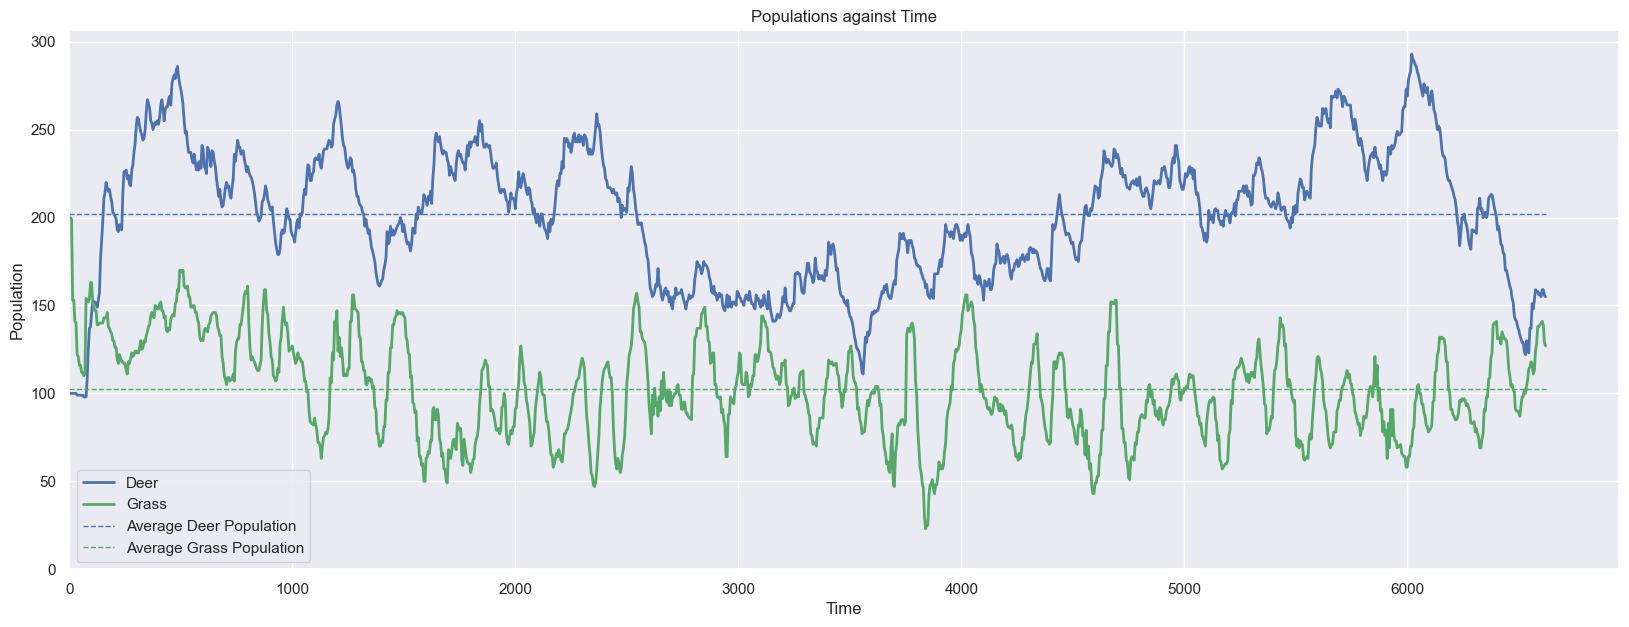

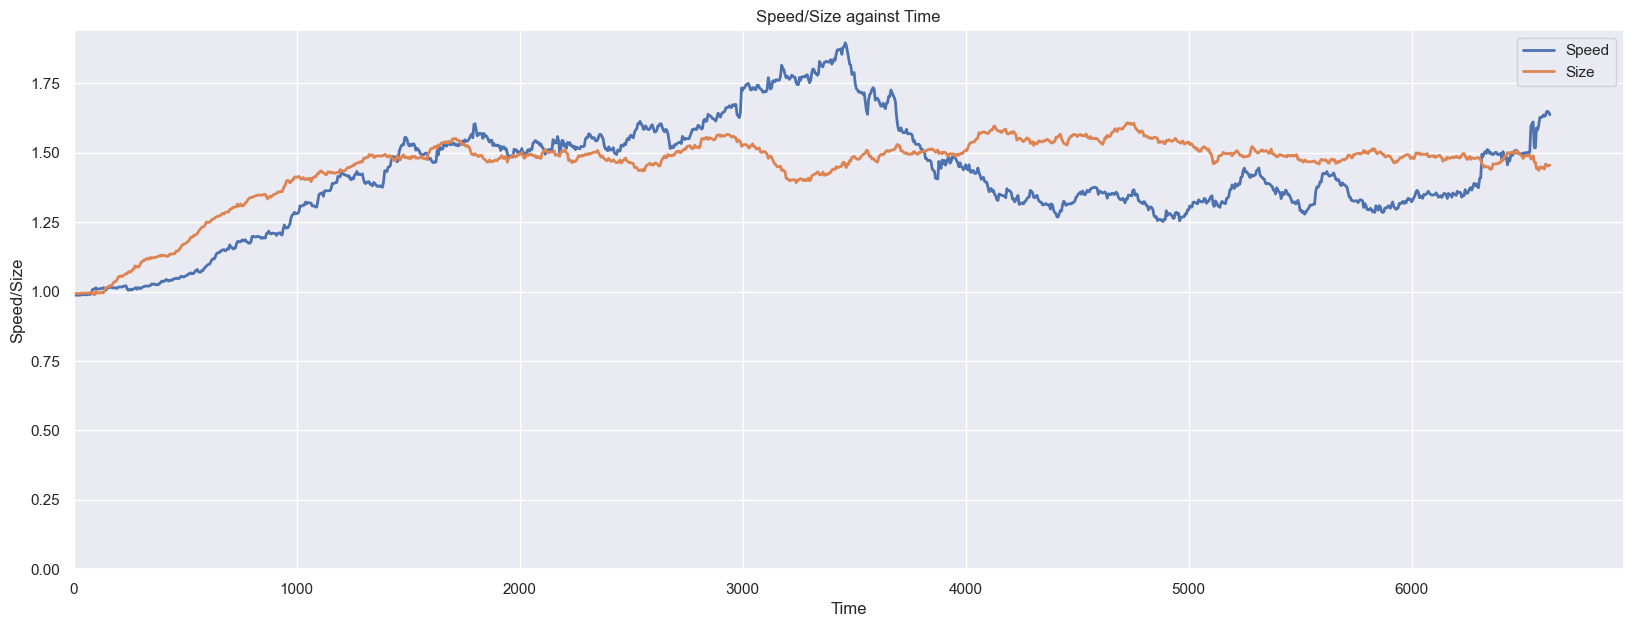

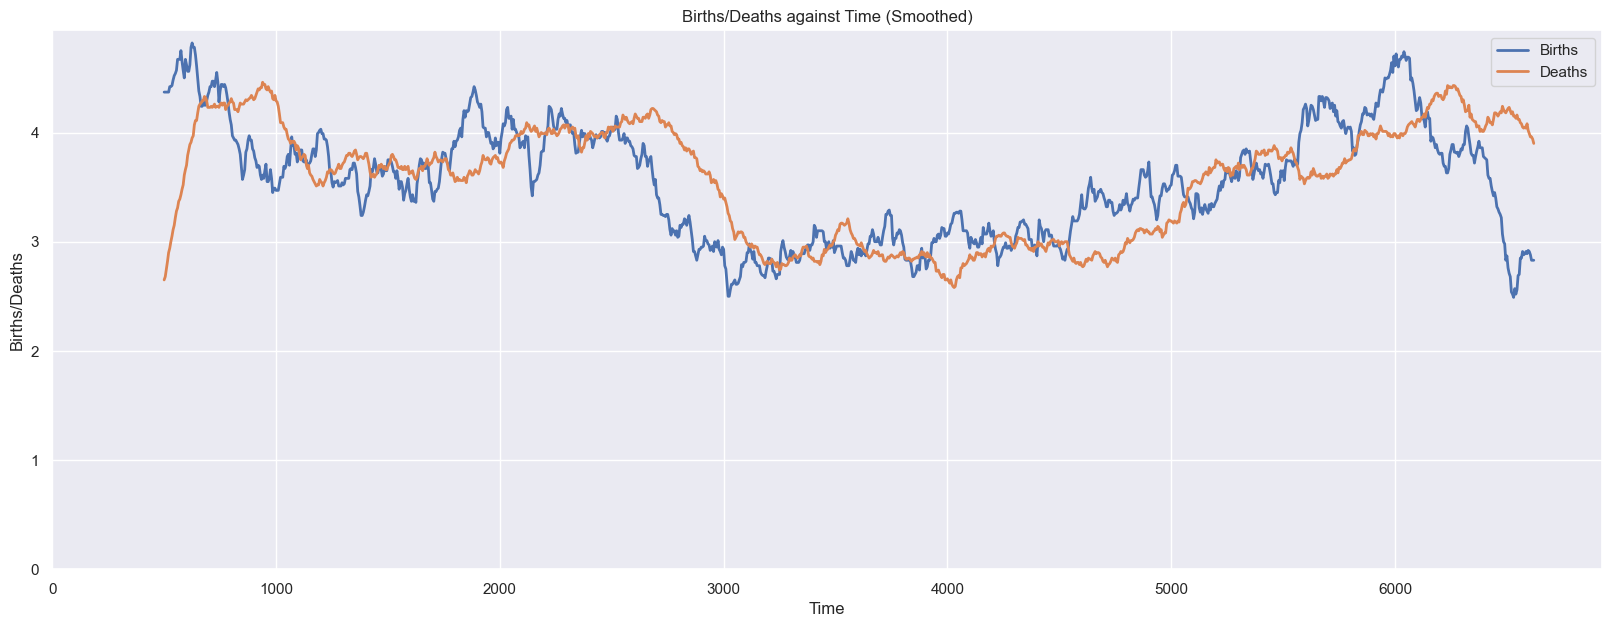

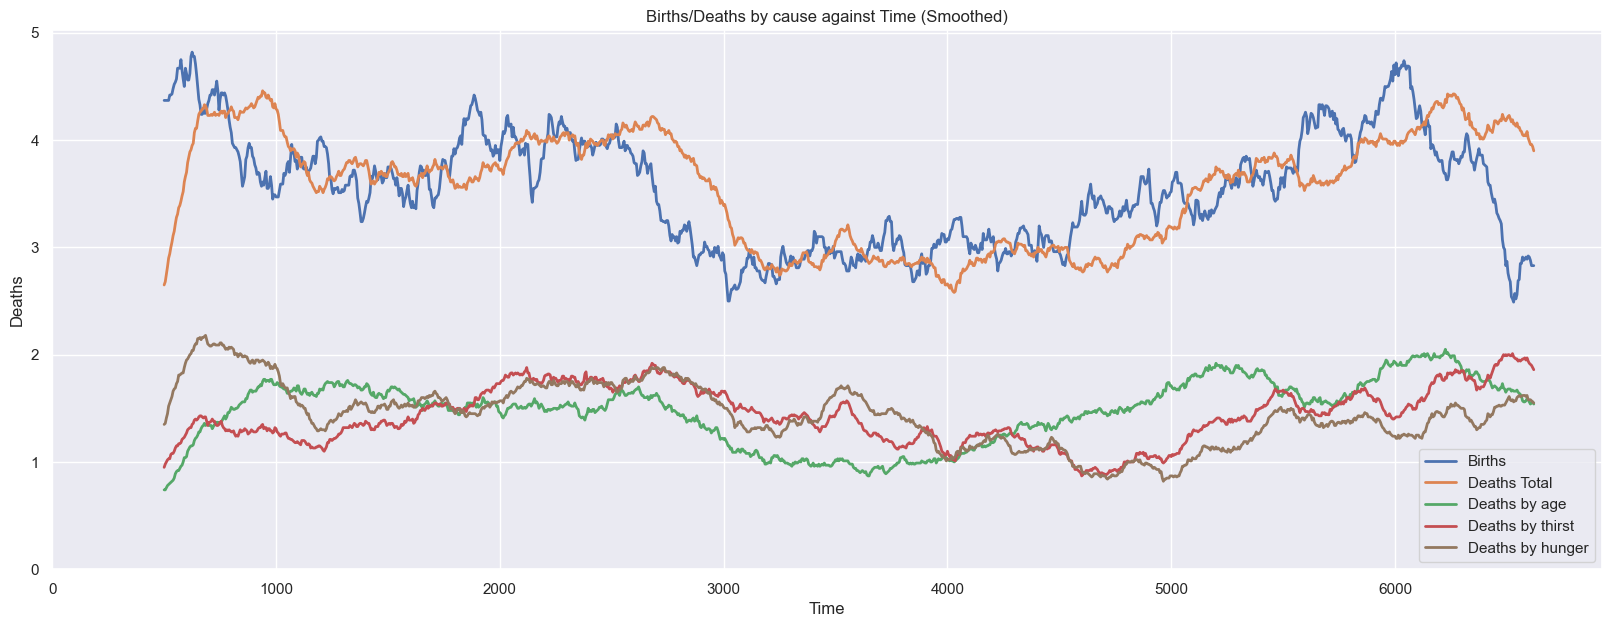

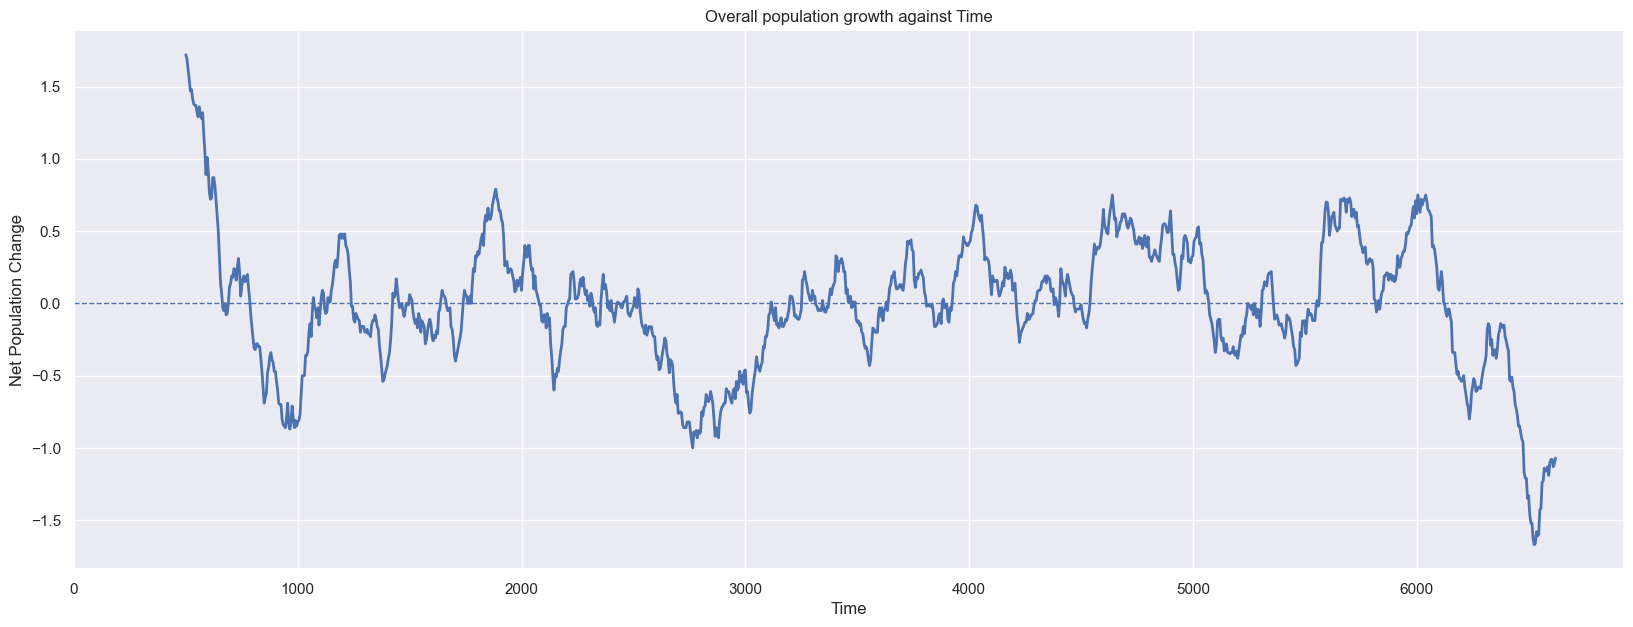

In [9]:
get_graphs_i_need("data/deer-100-plant-200.csv")

R = -0.09079013256627494
Average deer population: 221.0282012195122
Average grass population: 113.6829268292683
Average deer speed: 1.2026619416158537
Average deer size: 1.4815491653963413


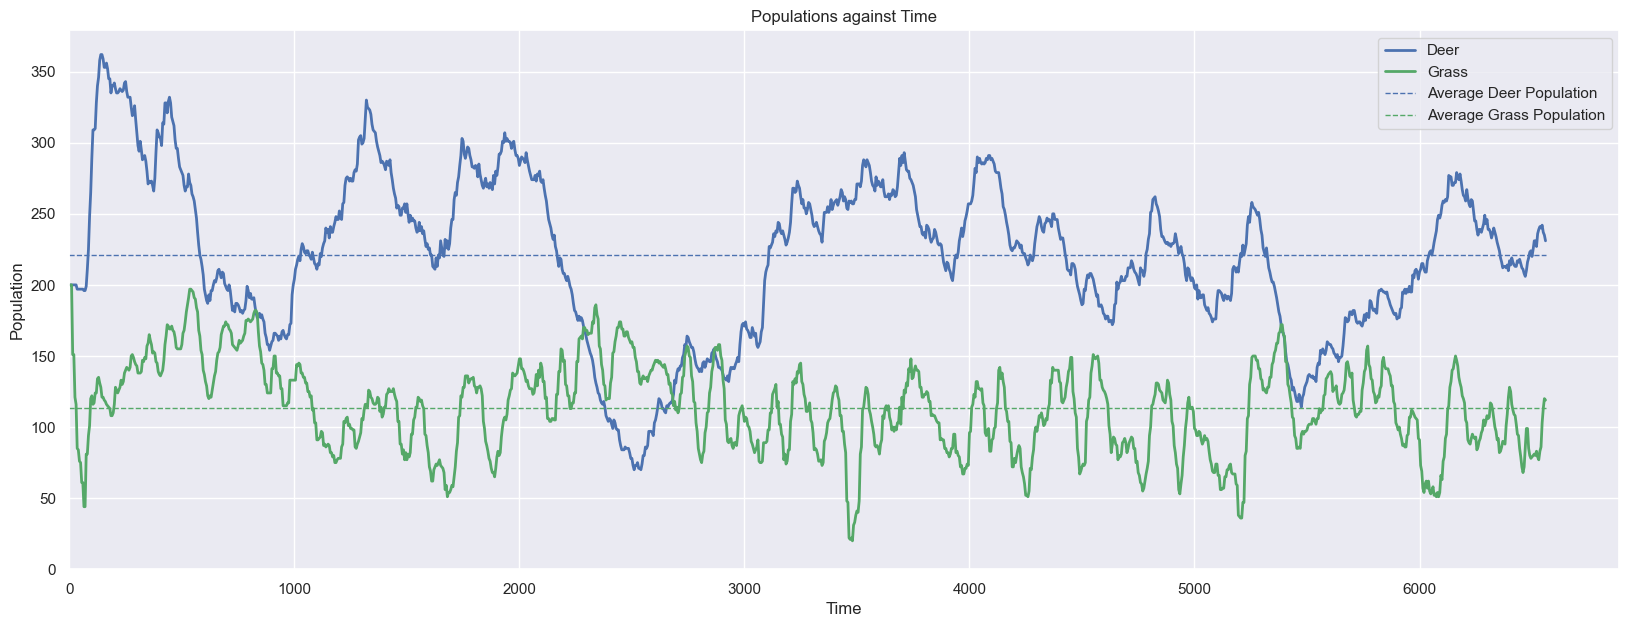

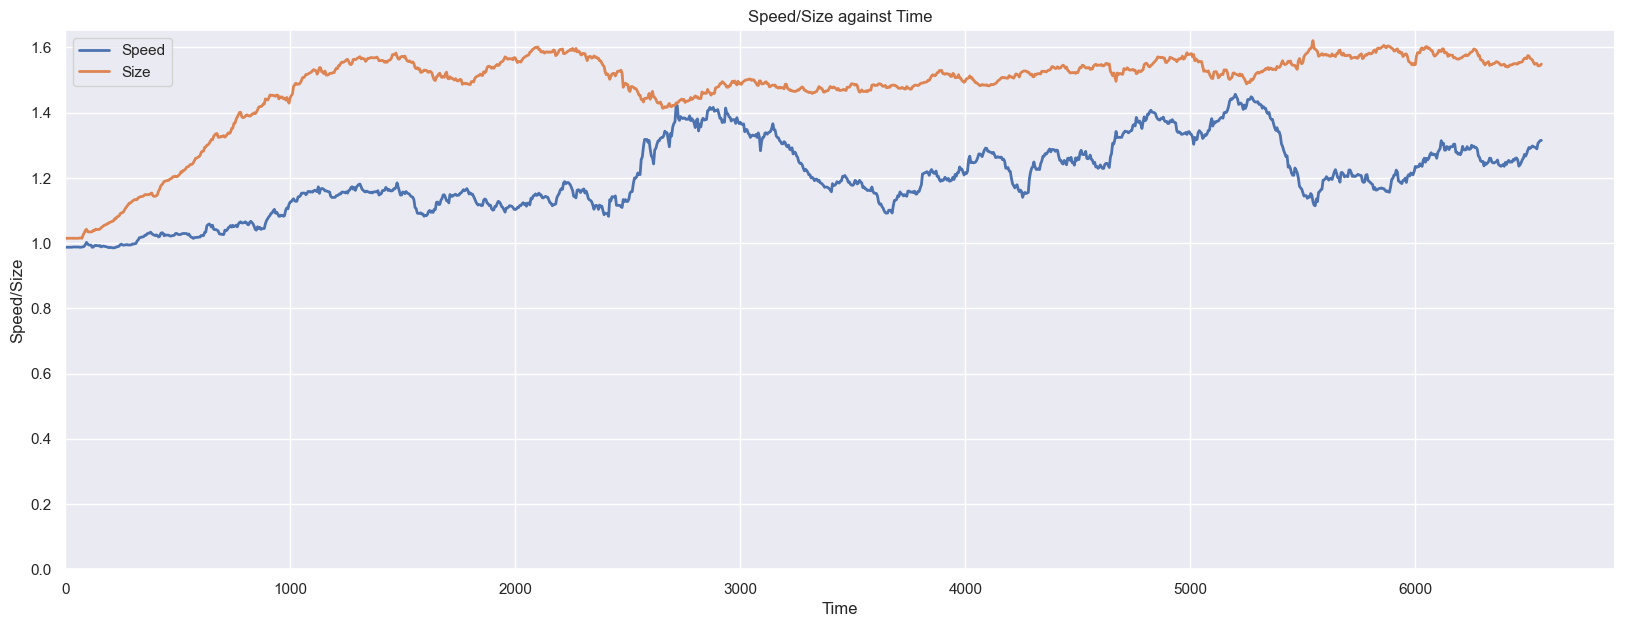

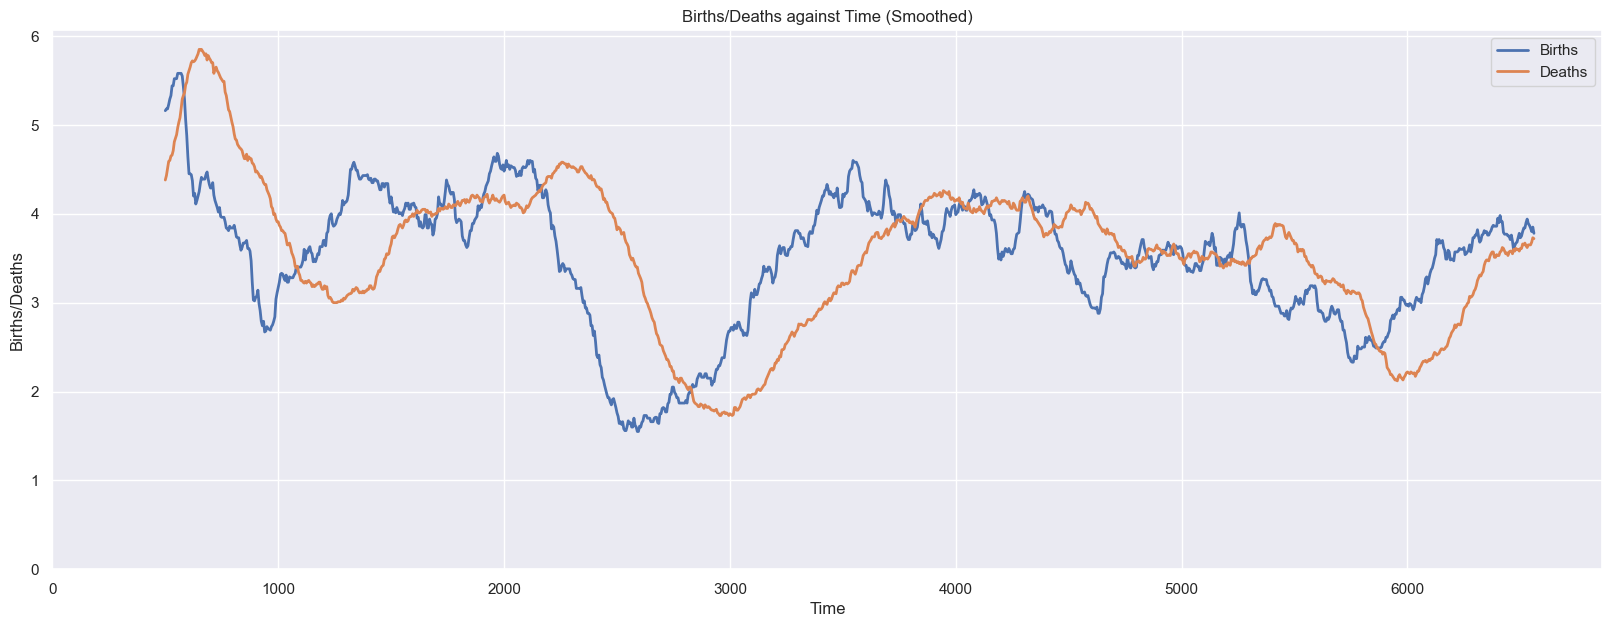

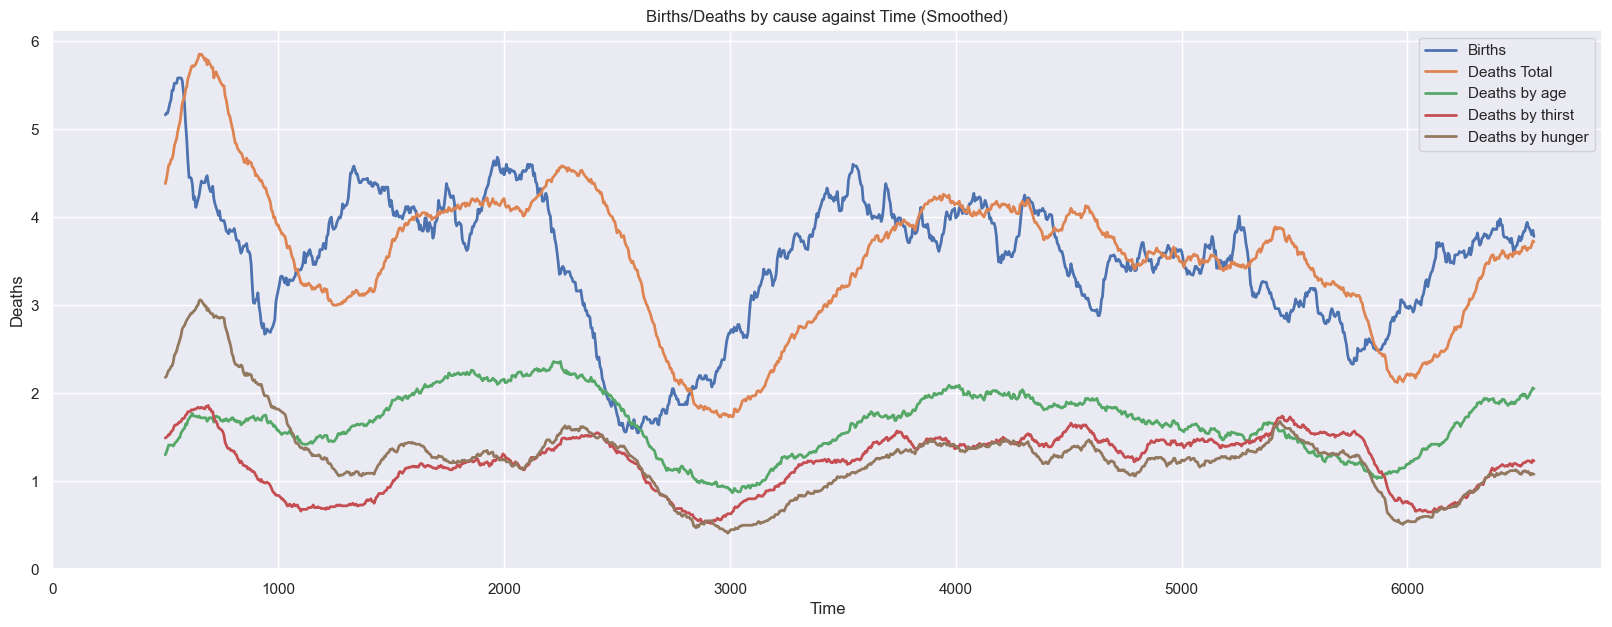

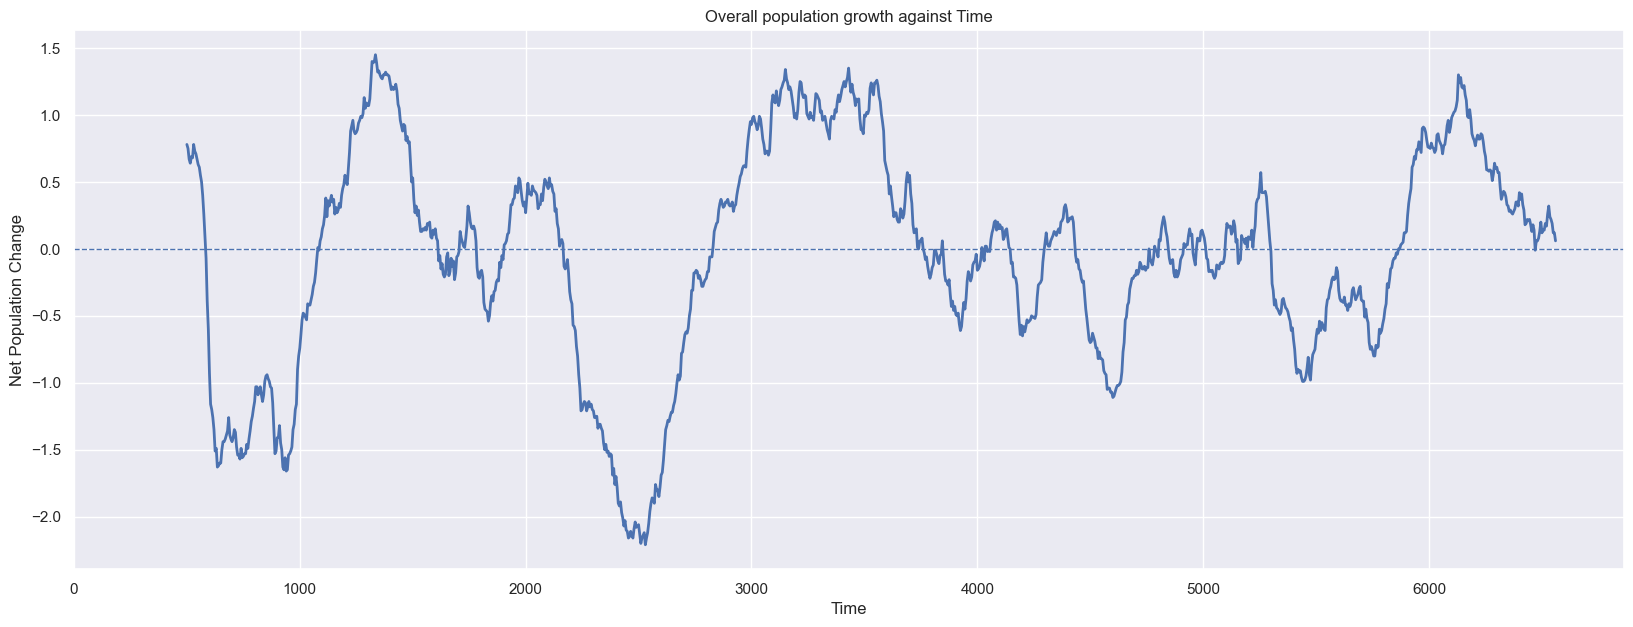

In [10]:
get_graphs_i_need("data/deer-200-plant-200.csv")

R = -0.017474771598659646
Average deer population: 222.9297583081571
Average grass population: 110.4607250755287
Average deer speed: 1.23644979244713
Average deer size: 1.4763959871601207


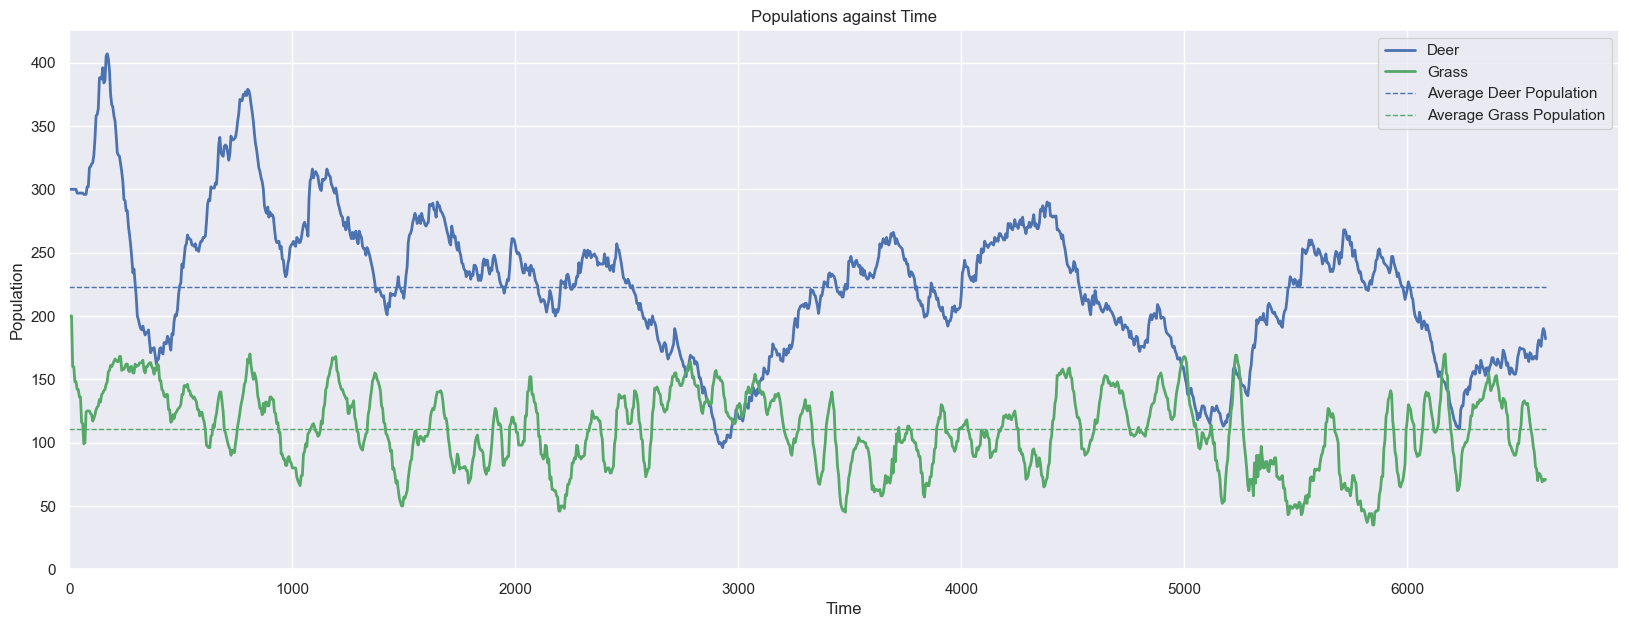

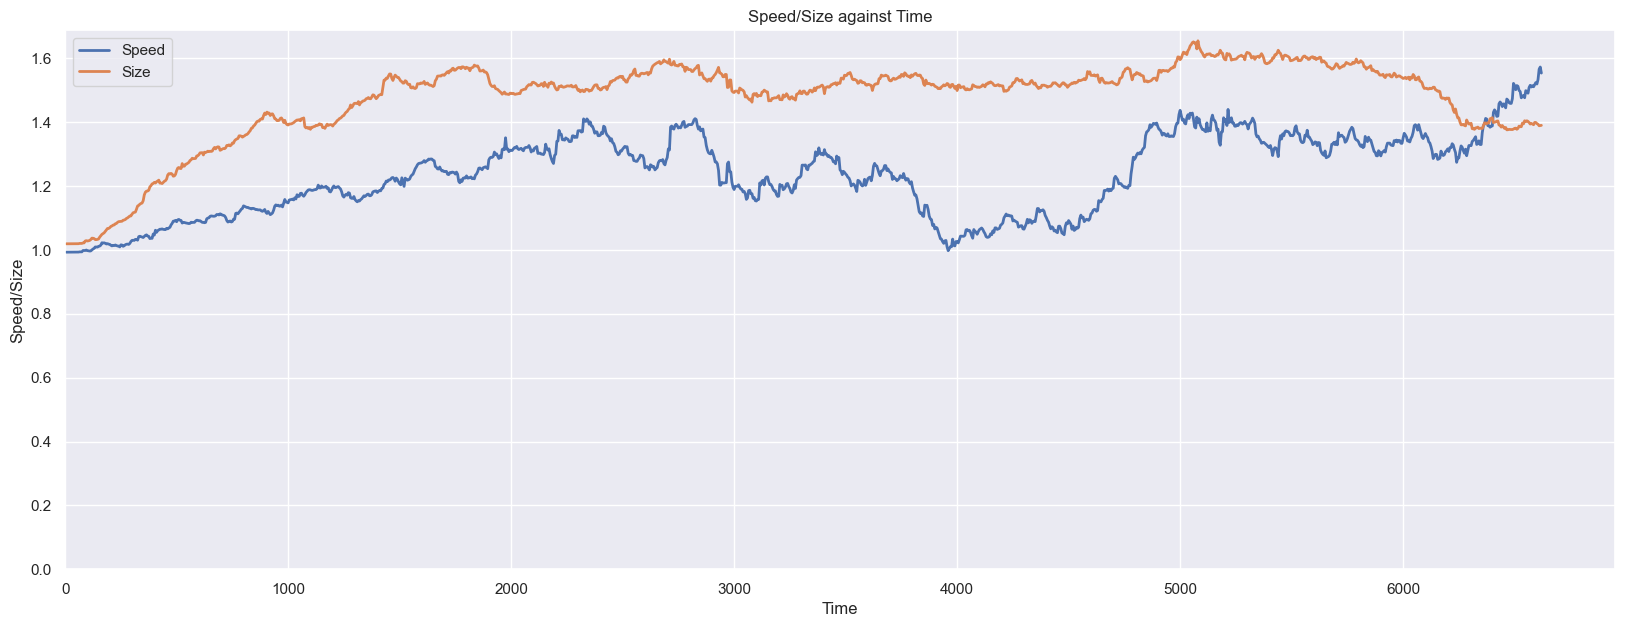

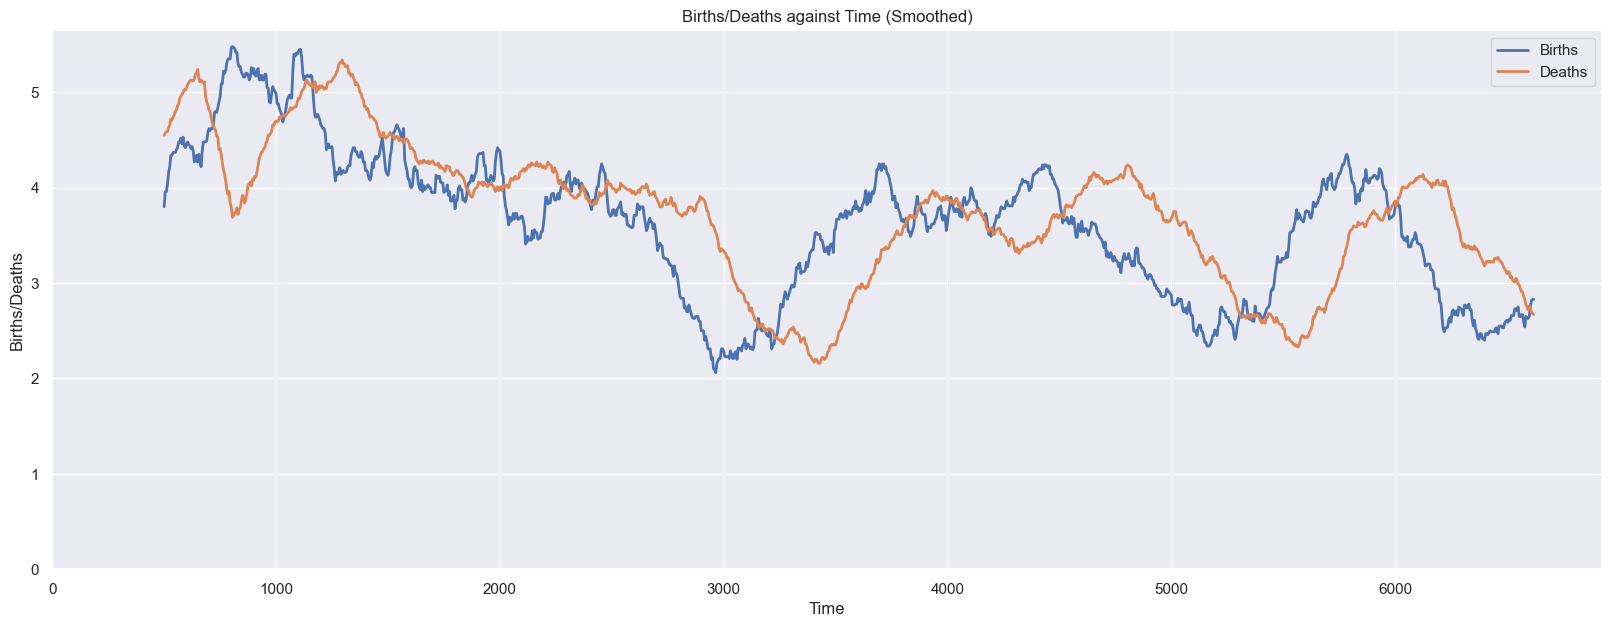

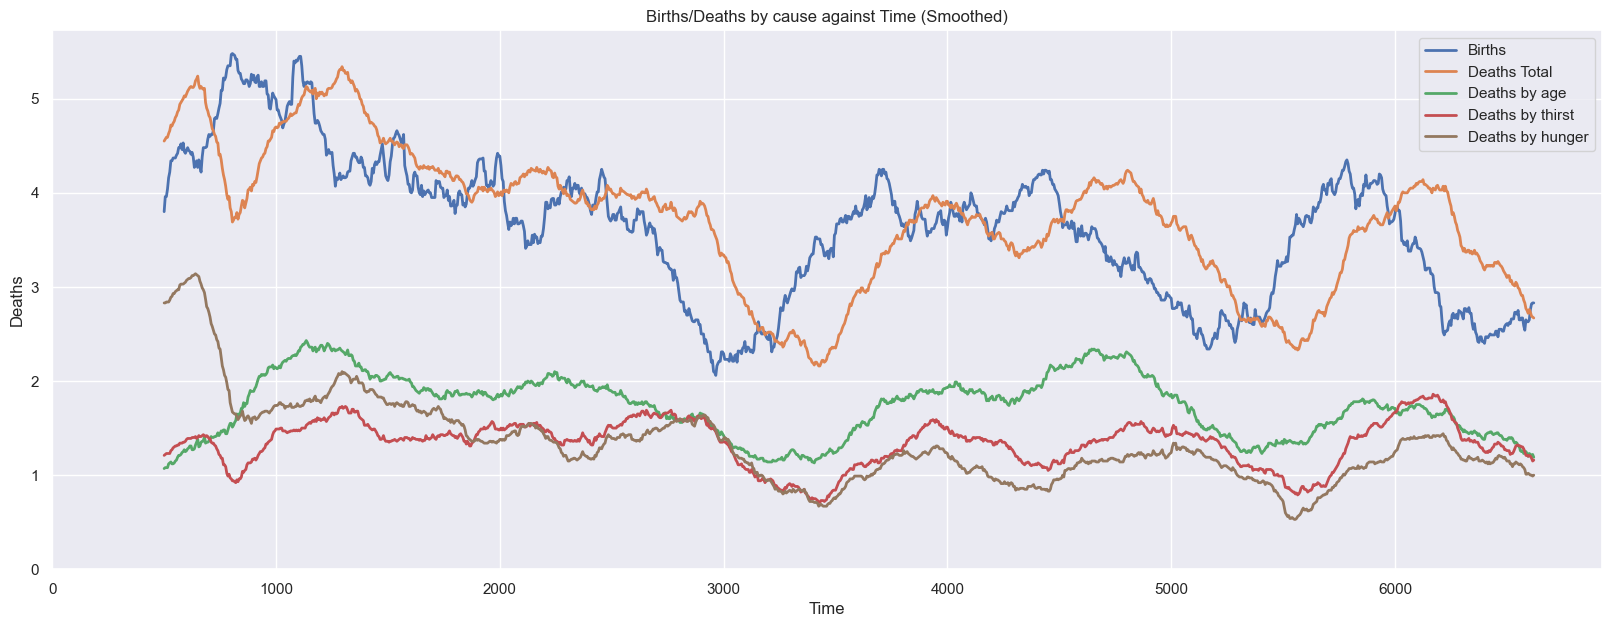

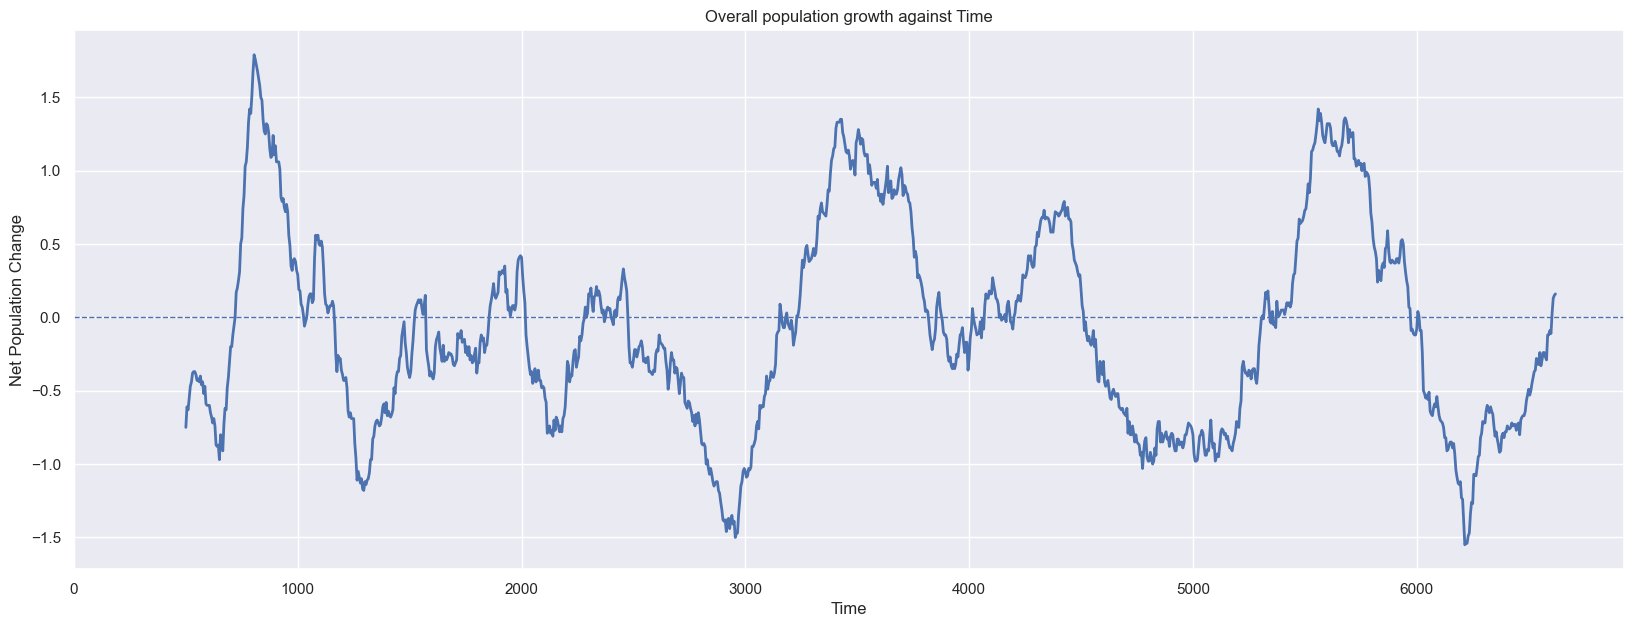

In [12]:
get_graphs_i_need("data/deer-300-plant-200.csv")

In [28]:
window_size = 25

df_100 = pd.read_csv("data/deer-100-plant-200.csv")
df_100 = df_100[df_100["time"] <= 6000]
df_100["deer_starting_population"] = 100
df_100["deathsByHungerSmoothed"] = df_100["deathsByHunger"].rolling(window_size).mean()

df_200 = pd.read_csv("data/deer-200-plant-200.csv")
df_200 = df_200[df_200["time"] <= 6000]
df_200["deer_starting_population"] = 200
df_200["deathsByHungerSmoothed"] = df_200["deathsByHunger"].rolling(window_size).mean()

df_300 = pd.read_csv("data/deer-300-plant-200.csv")
df_300 = df_300[df_300["time"] <= 6000]
df_300["deer_starting_population"] = 300
df_300["deathsByHungerSmoothed"] = df_300["deathsByHunger"].rolling(window_size).mean()

df_400 = pd.read_csv("data/deer-400-plant-200.csv")
df_400 = df_400[df_400["time"] <= 6000]
df_400["deer_starting_population"] = 400
df_400["deathsByHungerSmoothed"] = df_400["deathsByHunger"].rolling(window_size).mean()

all_dfs = [df_100, df_200, df_300, df_400]
df_overall = pd.concat(all_dfs)

df_by_population = pd.DataFrame.from_dict({ 
    "deer_starting_population": [100, 200, 300, 400], 
    "average_population": [np.average(df[(df['species'] == "Deer")]["population"]) for df in all_dfs],
    "average_speed": [np.average(df[df["species"] == "Deer"]["speed"]) for df in all_dfs],
    "average_size": [np.average(df[df["species"] == "Deer"]["size"]) for df in all_dfs],
    "average_deathsByHunger": [np.average(df[df["species"] == "Deer"]["deathsByHunger"]) for df in all_dfs],
})

Average deer population (100 initial deer): 201.72833333333332
Average deer population (200 initial deer): 219.55416666666667
Average deer population (300 initial deer): 229.0175
Average deer population (400 initial deer): 216.285

R = 0.6061575386056819
Std_err: 0.04929715910509792


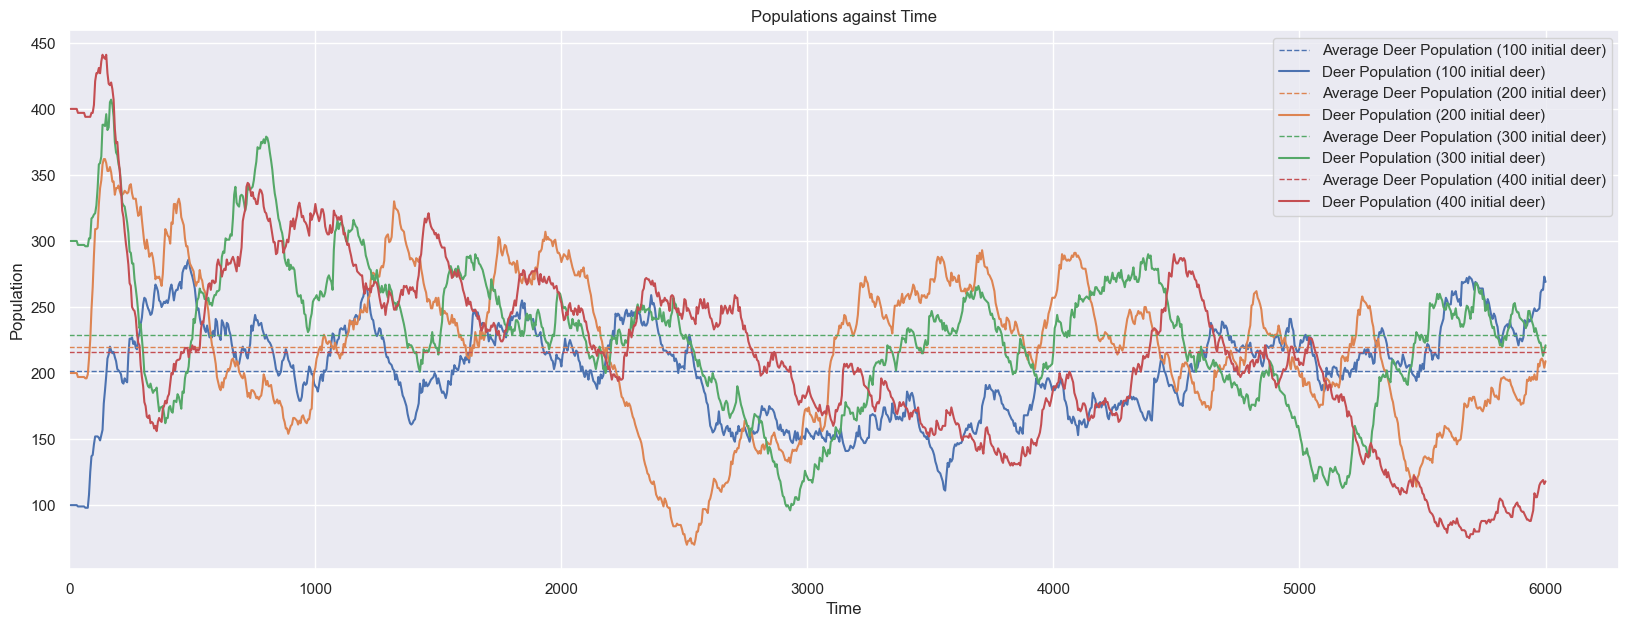

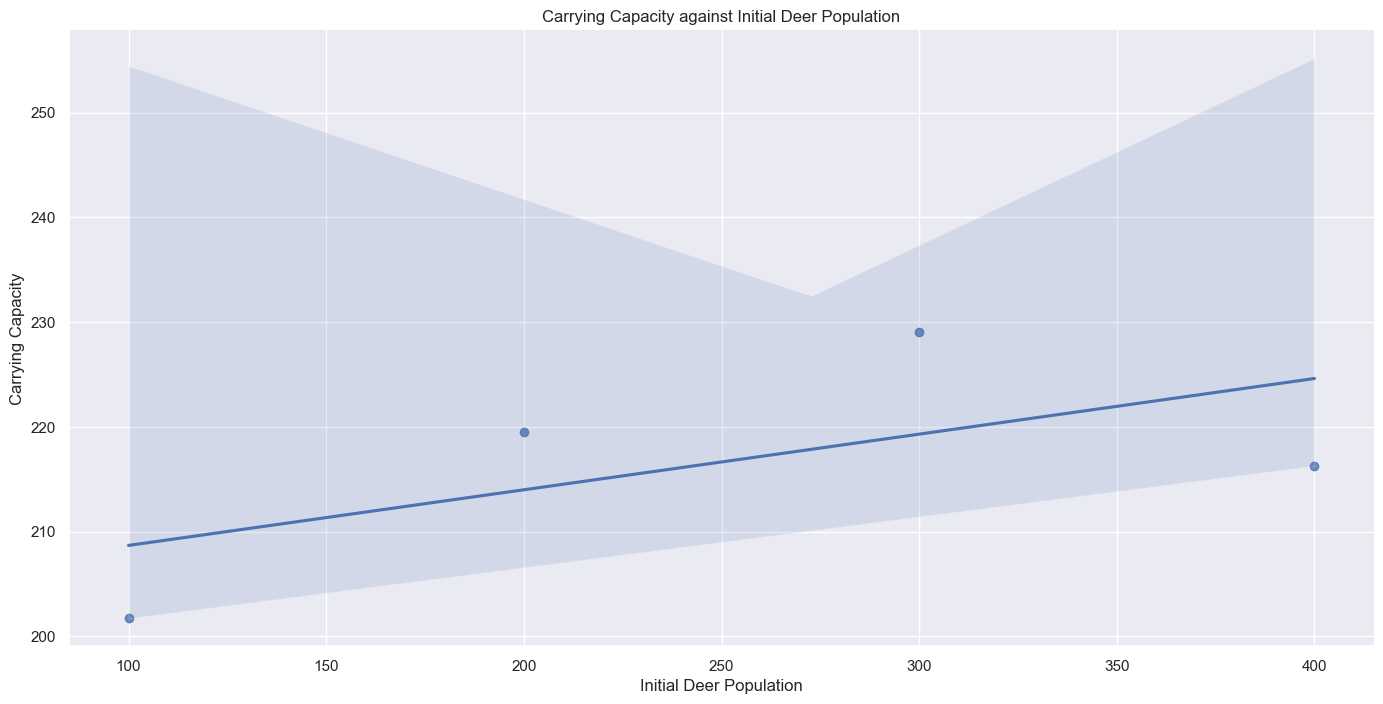

In [29]:
plt.figure(figsize=(20, 7))
plt.title("Populations against Time")

for i, df in enumerate(all_dfs):
    data_count = max(df[df["species"] == "Deer"]["time"])
    deer_starting_population = df.iloc[0]["deer_starting_population"]
    column_average = np.average(df[df["species"] == "Deer"]["population"])

    print(f"Average deer population ({deer_starting_population} initial deer): {column_average}")
    plt.plot([0, data_count], [column_average, column_average], linewidth=1, label=f"Average Deer Population ({deer_starting_population} initial deer)", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y="population", color=sns.color_palette()[i], linewidth=1.5, label=f"Deer Population ({deer_starting_population} initial deer)")

g.set_xlabel("Time")
g.set_ylabel("Population")
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_population, x="deer_starting_population", y="average_population", height=7, aspect=2)
plt.gca().set_title("Carrying Capacity against Initial Deer Population")
g.set(ylabel="Carrying Capacity", xlabel="Initial Deer Population")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_population["deer_starting_population"], df_by_population["average_population"])
print(f"R = {r_value}\nStd_err: {std_err}")

Average deer speed (100 initial deer): 1.4125815705
Average deer speed (200 initial deer): 1.1964047928333332
Average deer speed (300 initial deer): 1.2205564876666666
Average deer speed (400 initial deer): 1.1351603175833334

R = -0.8709153950299553
Std_err: 0.00032243703888001966


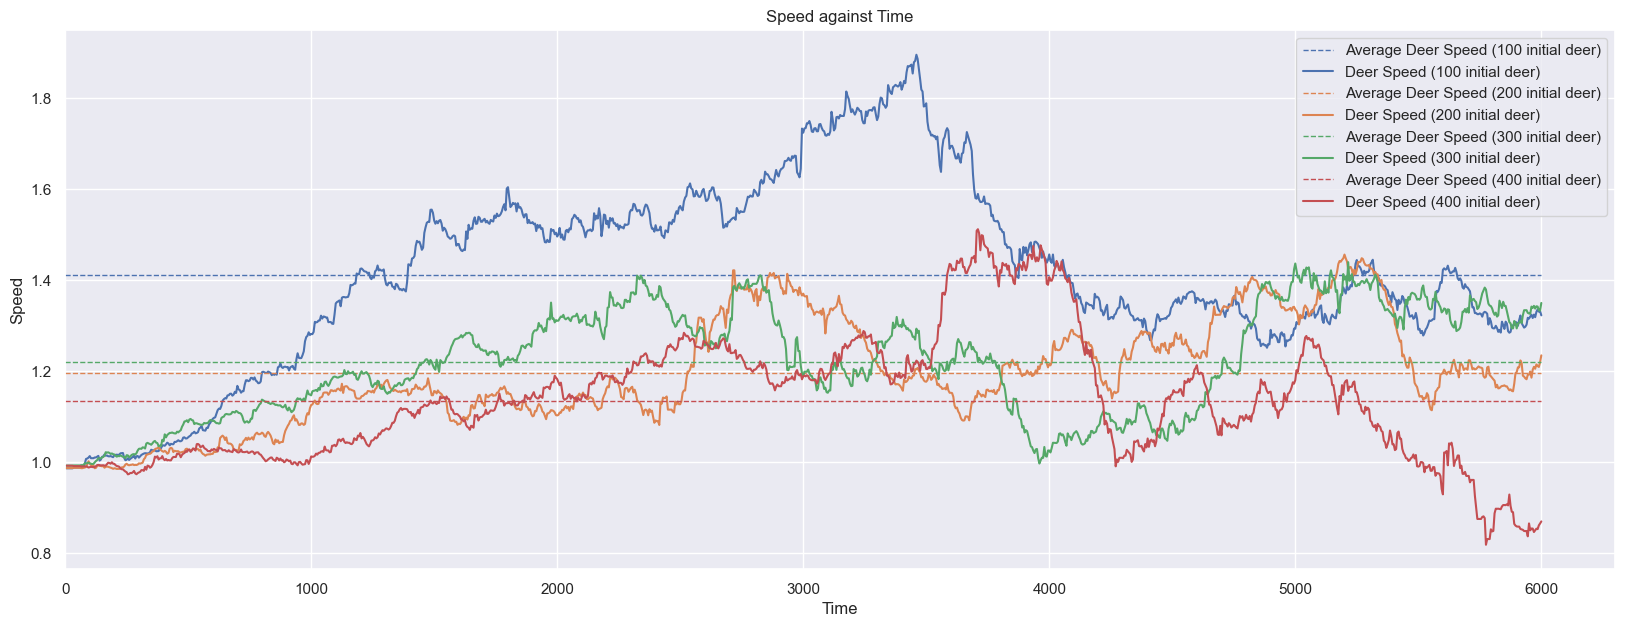

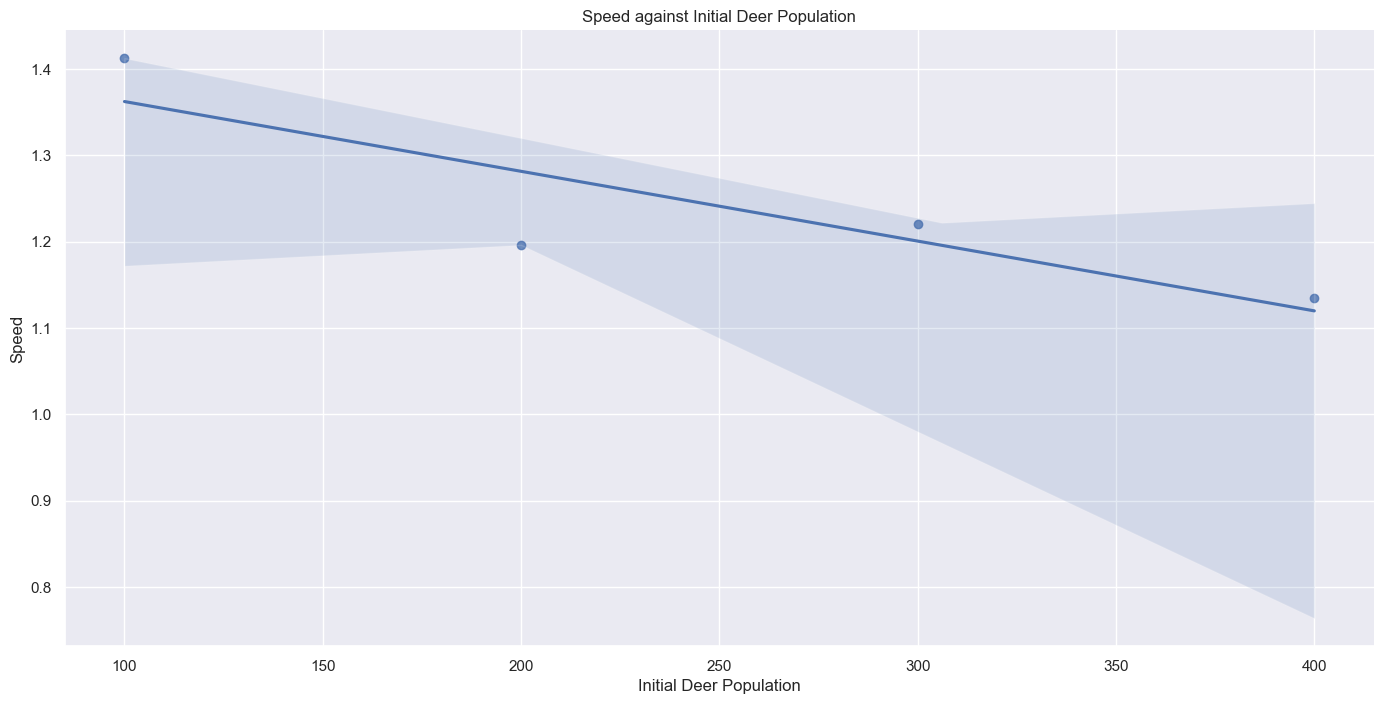

In [30]:
column = "speed"
label="Speed"

plt.figure(figsize=(20, 7))
plt.title(f"{label} against Time")

for i, df in enumerate(all_dfs):
    data_count = max(df[df["species"] == "Deer"]["time"])
    deer_starting_population = df.iloc[0]["deer_starting_population"]
    column_average = np.average(df[df["species"] == "Deer"][column])

    print(f"Average deer {column} ({deer_starting_population} initial deer): {column_average}")
    plt.plot([0, data_count], [column_average, column_average], linewidth=1, label=f"Average Deer {label} ({deer_starting_population} initial deer)", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y=column, color=sns.color_palette()[i], linewidth=1.5, label=f"Deer {label} ({deer_starting_population} initial deer)")

g.set_xlabel("Time")
g.set_ylabel(label)
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_population, x="deer_starting_population", y=f"average_{column}", height=7, aspect=2)
plt.gca().set_title(f"{label} against Initial Deer Population")
g.set(ylabel=label, xlabel="Initial Deer Population")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_population["deer_starting_population"], df_by_population[f"average_{column}"])
print(f"R = {r_value}\nStd_err: {std_err}")

Average deer size (100 initial deer): 1.4474148050833333
Average deer size (200 initial deer): 1.4734946375
Average deer size (300 initial deer): 1.4807528208333334
Average deer size (400 initial deer): 1.53086125

R = 0.9531059091548192
Std_err: 5.783722819898504e-05


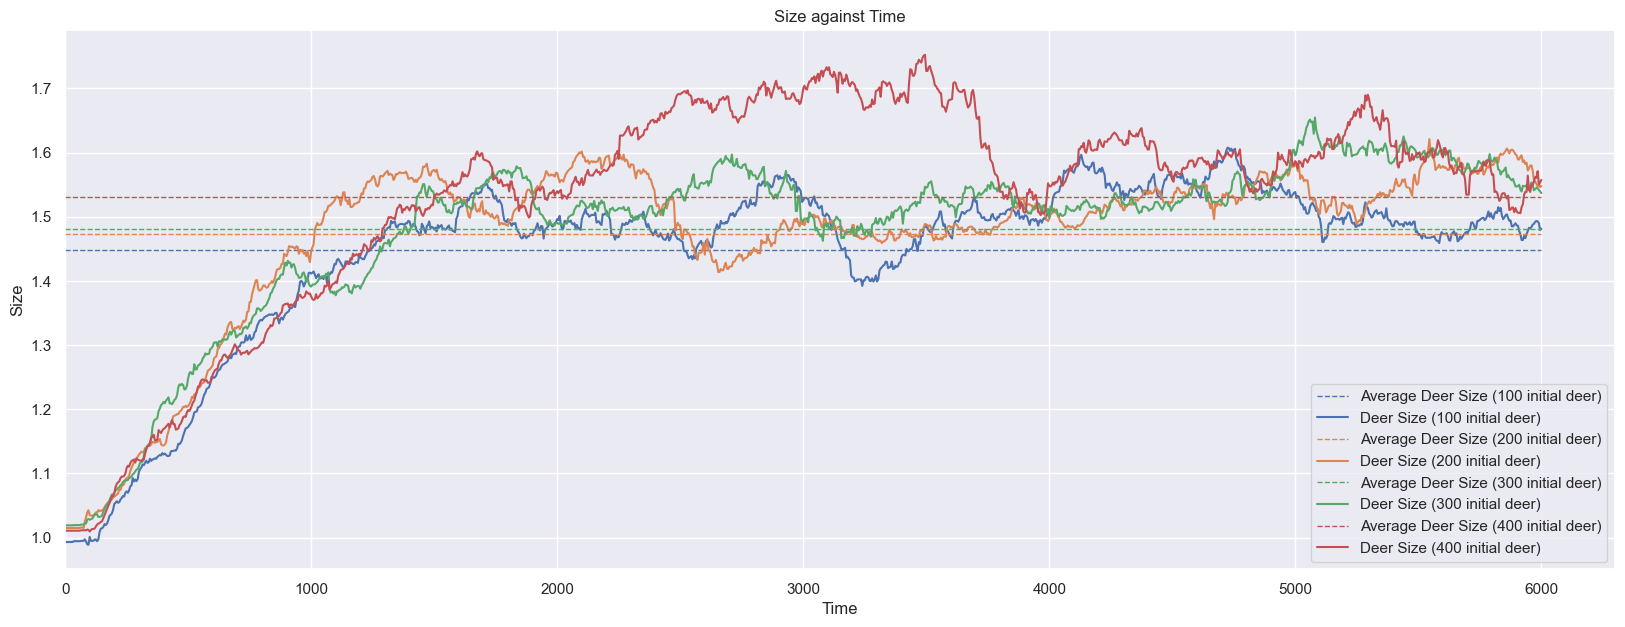

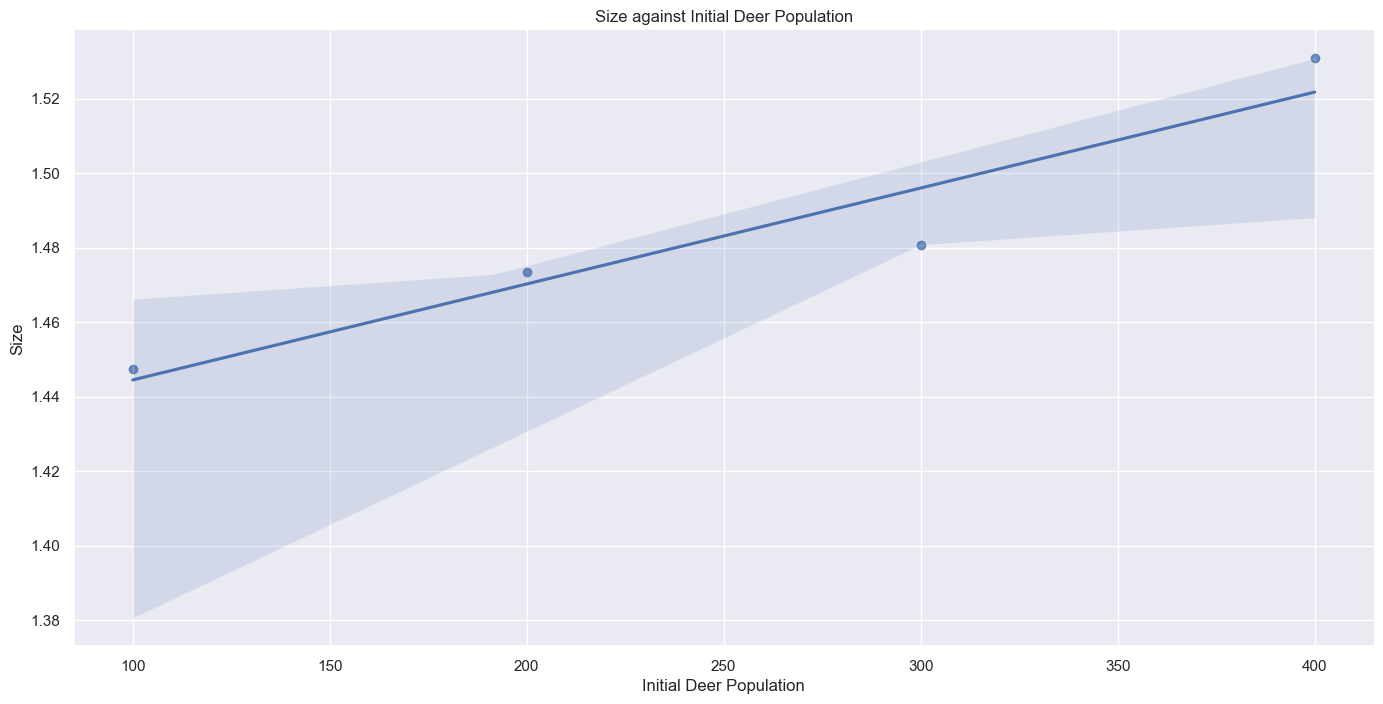

In [31]:
column = "size"
label="Size"

plt.figure(figsize=(20, 7))
plt.title(f"{label} against Time")

for i, df in enumerate(all_dfs):
    data_count = max(df[df["species"] == "Deer"]["time"])
    deer_starting_population = df.iloc[0]["deer_starting_population"]
    column_average = np.average(df[df["species"] == "Deer"][column])

    print(f"Average deer {column} ({deer_starting_population} initial deer): {column_average}")
    plt.plot([0, data_count], [column_average, column_average], linewidth=1, label=f"Average Deer {label} ({deer_starting_population} initial deer)", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y=column, color=sns.color_palette()[i], linewidth=1.5, label=f"Deer {label} ({deer_starting_population} initial deer)")

g.set_xlabel("Time")
g.set_ylabel(label)
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_population, x="deer_starting_population", y=f"average_{column}", height=7, aspect=2)
plt.gca().set_title(f"{label} against Initial Deer Population")
g.set(ylabel=label, xlabel="Initial Deer Population")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_population["deer_starting_population"], df_by_population[f"average_{column}"])
print(f"R = {r_value}\nStd_err: {std_err}")